In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path if necessary)
df = pd.read_csv("air traffic.csv",sep=',')

# Display the first few rows
df.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [57]:
df.columns

print(df.shape)

df.info()

(249, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [58]:
# Selecting columns of type 'object'

object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    df[col] = df[col].str.replace(',', '')        # Remove commas (if numbers are formatted 1,000 -> 1000)
    df[col] = df[col].str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    int64  
 3   Int_Pax  249 non-null    int64  
 4   Pax      249 non-null    int64  
 5   Dom_Flt  249 non-null    int64  
 6   Int_Flt  249 non-null    int64  
 7   Flt      249 non-null    int64  
 8   Dom_RPM  249 non-null    int64  
 9   Int_RPM  249 non-null    int64  
 10  RPM      249 non-null    int64  
 11  Dom_ASM  249 non-null    int64  
 12  Int_ASM  249 non-null    int64  
 13  ASM      249 non-null    int64  
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(14)
memory usage: 33.2 KB


In [60]:
# Check for missing values
print(df.isnull().sum())

Year       0
Month      0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_Flt    0
Int_Flt    0
Flt        0
Dom_RPM    0
Int_RPM    0
RPM        0
Dom_ASM    0
Int_ASM    0
ASM        0
Dom_LF     0
Int_LF     0
LF         0
dtype: int64


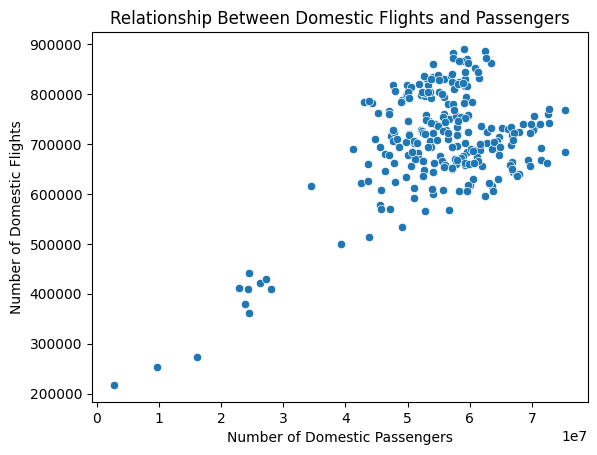

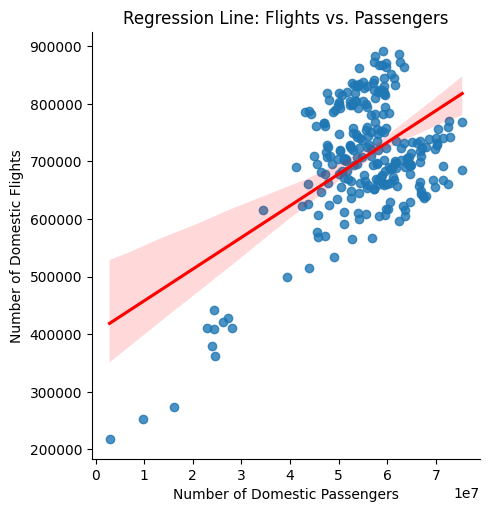

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Dom_Pax', y='Dom_Flt', data=df)
plt.title('Relationship Between Domestic Flights and Passengers')
plt.xlabel('Number of Domestic Passengers')
plt.ylabel('Number of Domestic Flights')
plt.show()

sns.lmplot(x='Dom_Pax', y='Dom_Flt', data=df, line_kws={'color': 'red'})
plt.title('Regression Line: Flights vs. Passengers')
plt.xlabel('Number of Domestic Passengers')
plt.ylabel('Number of Domestic Flights')
plt.show()

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define independent (X) and dependent (y) variables
X = df[['Dom_Pax']]
y = df['Dom_Flt']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model parameters
print(f'Intercept: {model.intercept_:.2f}')
print(f'Slope (Coefficient): {model.coef_[0]:.2f}')

Intercept: 373356.47
Slope (Coefficient): 0.01


In [65]:
# Predict using the test data
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

     Actual      Predicted
137  701992  727558.286421
6    831619  706931.535408
97   625530  634294.612595
60   793275  673666.098310
112  725712  706564.410676


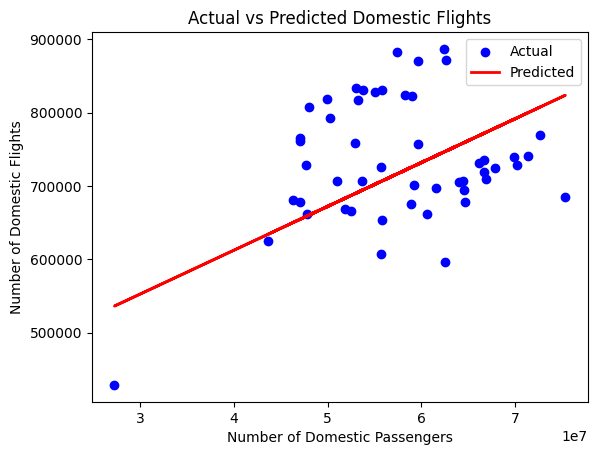

In [66]:
# Plotting actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Domestic Flights')
plt.xlabel('Number of Domestic Passengers')
plt.ylabel('Number of Domestic Flights')
plt.legend()
plt.show()

Significant deviations between predicted and actual values ​​can be observed.

In [68]:
import pandas as pd
from scipy import stats

# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df['Dom_Pax'], df['Dom_Flt']
)

# Print regression parameters
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"P-value: {p_value:.5f}")
print(f"Standard Error: {std_err:.2f}")
print(f"R value: {r_value:.2f}")


# Predict the number of flights for 100 domestic passengers
passengers_input = 100
predicted_flights = slope * passengers_input + intercept
print(f"Predicted flights for 100 Domestic Passengers: {predicted_flights:.2f}")

Slope: 0.01
Intercept: 402758.72
P-value: 0.00000
Standard Error: 0.00
R value: 0.54
Predicted flights for 100 Domestic Passengers: 402759.27


An R value of 0.54 indicates a moderate to weak but positive correlation.
This means that as the first variable, x=Dom_Pax, increases, the variable y=Dom_Flt also tends to increase, but not necessarily in a perfectly linear manner.
The relationship is not extremely strong, but there is a visible trend.

P-value < 0.05, which means that the variable Dom_Pax is a significant variable and that it is a variable that has an influence on Dom_Flt .

In [69]:
# Define the linear model function
def linear_model(x):
    return slope * x + intercept

In [70]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df['Month'], df['Dom_Flt']
)

# Print the regression parameters
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"P-value: {p_value:.5f}")
print(f"Standard Error: {std_err:.2f}")

Slope: 2808.80
Intercept: 688645.77
P-value: 0.15529
Standard Error: 1970.46


P-value >0.05, which means that the variable Month is not a significant variable and it is a variable that has a negligible influence on Domestic Flights

In [71]:
# Define the linear model function
def linear_model(x):
    return slope * x + intercept

In [72]:
# Apply the model to predict domestic flights
df['Predicted_Flights'] = linear_model(df['Month'])

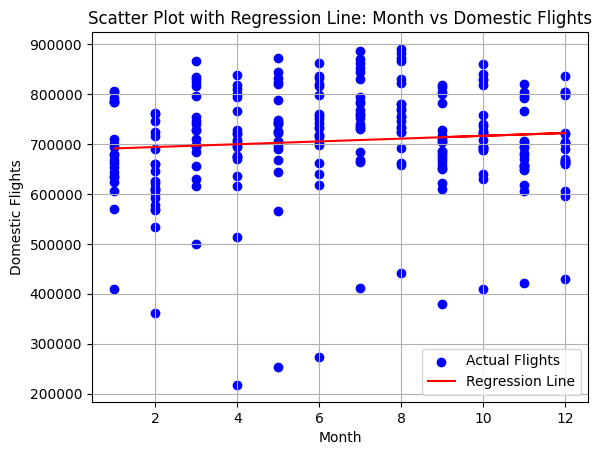

In [73]:
# Plot the actual data points
plt.scatter(df['Month'], df['Dom_Flt'], color='blue', label='Actual Flights')

# Plot the regression line
plt.plot(df['Month'], df['Predicted_Flights'], color='red', label='Regression Line')

# Customize the plot
plt.title('Scatter Plot with Regression Line: Month vs Domestic Flights')
plt.xlabel('Month')
plt.ylabel('Domestic Flights')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# Print R-squared value
r_squared = r_value ** 2
print(f"R-squared (R²): {r_squared:.4f}")

R-squared (R²): 0.0082


The R-squared is very close to 0, R-squared=0.0082. The model explains no variance, which is as bad as always predicting the mean.

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#  Prepare the features (X) and target (y), reshaping with .reshape(-1, 1)
X = df['Month'].values.reshape(-1, 1)
y = df['Dom_Flt'].values.reshape(-1, 1)

#  Split the data into training and validation sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions on the validation set
y_pred = model.predict(X_test)

#  Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Slope (Coefficient): {model.coef_[0][0]:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

#  Make a prediction for a given input (e.g., Month = 8)
month_input = np.array([[8]])  # Input must be reshaped to 2D
predicted_flights = model.predict(month_input)
print(f'Predicted Flights for Month 8: {predicted_flights[0][0]:.2f}')


Intercept: 676894.60
Slope (Coefficient): 3534.55
Mean Squared Error (MSE): 8412063049.29
Root Mean Squared Error (RMSE): 91717.30
R-squared (R²): -0.1913
Predicted Flights for Month 8: 705171.00


The MSE value is really very high, which implies a significant discrepancy between the predicted values ​​and the actual values. This difference is reflected in the R-square value, which shows a negative value, which may mean that the model is very bad and gives very poor predictions.

In [76]:
#  Make predictions for the training set and validation set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#  Calculate Mean Squared Error (MSE) for both sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error (MSE) for Training Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) for Validation Set: {mse_test:.2f}")

Mean Squared Error (MSE) for Training Set: 12123023766.20
Mean Squared Error (MSE) for Validation Set: 8412063049.29


It's quite strange that the MSE value for the training set is higher than the MSE value for the validation test.

Which would mean that the validation test model would make fewer errors than the training model, hence the strange observed result.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



#  Prepare the features (mx) and target (my)
mx = df[['Month', 'Dom_Pax']].values.reshape(-1, 2)  # Features in 2D
my = df['Dom_Flt'].values.reshape(-1, 1)                # Target in 2D

#  Split the data into training and validation sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(mx, my, test_size=0.2, random_state=42)

#  Fit the multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Calculate the R² score on the training data
r2_score_train = model.score(X_train, y_train)
print(f'R-squared (R²) on Training Set: {r2_score_train:.4f}')

#  Print the actual target values (from validation set)
print("Actual target values (y_test):")
print(y_test.flatten())  # Flatten for better readability

y_pred = model.predict(X_test)
print("Predicted target values:", y_pred)

#  Make a prediction using the multiple regression model
# Example input: Month = 13, Domestic_Passengers = 30000
input_data = np.array([[13, 30000]])
predicted_flights = model.predict(input_data)
print(f'Predicted Flights for Month 13 with 30000 Passengers: {predicted_flights[0][0]:.2f}')


R-squared (R²) on Training Set: 0.3330
Actual target values (y_test):
[701992 831619 625530 793275 725712 653344 740482 695306 818308 706395
 769675 428768 740181 596437 823517 662000 607916 817899 731044 807338
 684939 882979 757484 728377 735233 828218 872349 765842 887084 662014
 705071 831265 665490 675633 760955 706994 871049 708988 718817 697830
 669260 681152 677704 724065 678121 833350 729115 758538 706747 823793]
Predicted target values: [[727082.46160628]
 [707212.57786742]
 [631760.66466288]
 [670271.90901805]
 [705561.24940374]
 [703468.12921293]
 [798370.78976712]
 [757269.62247973]
 [674275.75242569]
 [679797.91668424]
 [808336.63792539]
 [540744.86359736]
 [793019.88216683]
 [750083.23011737]
 [726612.95934614]
 [736506.75955481]
 [703214.35155542]
 [690081.15878265]
 [768576.35044755]
 [656794.38123286]
 [823519.78450663]
 [717188.26022197]
 [730260.13986653]
 [660170.04756077]
 [772363.58491357]
 [704851.64948617]
 [748553.16674961]
 [657768.03024132]
 [746357.37261716

In [78]:
# Calculate the population mean of the 'Year' column
mean_year = df['Year'].mean()

# Print the result
print(f"Population Mean of 'Year' column: {mean_year:.2f}")

Population Mean of 'Year' column: 2012.88


In [79]:
sample=np.random.choice(df["Year"],50)
print(sample)


[2011 2008 2003 2007 2009 2011 2021 2007 2008 2017 2009 2013 2013 2003
 2009 2017 2004 2011 2009 2016 2004 2021 2021 2021 2021 2020 2015 2008
 2023 2011 2021 2022 2023 2017 2003 2004 2021 2003 2012 2021 2004 2014
 2019 2005 2009 2012 2012 2017 2019 2017]


In [80]:
## Perform a one-sample t-test to compare the sample mean with the population mean.

import numpy as np
from scipy import stats




# Sample data:
sample=np.random.choice(df["Year"],50)


# Population mean
Population_mean= df['Year'].mean()
print(Population_mean)

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample, Population_mean)

# Output results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

2012.879518072289
T-statistic: -0.046642352019008584
P-value: 0.9629878585663594
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [81]:
# Randomly select a sample of 50 from the 'Flt' column
sample_a = np.random.choice(df["Dom_Flt"],50)

# Randomly select a sample of 50 from the 'Dom_Pax' column
sample_b=np.random.choice(df["Dom_Pax"],50)
# Perform an independent t-test (assuming equal variance)
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the means.")

T-statistic: -24.644202527998328
P-value: 8.622915841049964e-44
Reject the null hypothesis: There is a significant difference between the means.
